# Assignment 3

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton cone is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

(296000000.0, 300000000.0)

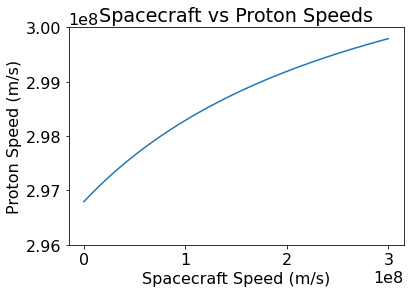

In [210]:
#PART A
c = constants.c

#u = proton speed measured by Frank, u_prime = speed of the proton in Mary's frame, and v = speed of the spacecraft relative to Frank
u_prime = 0.99*c #Speed of the Protons in Mary's Frame
v = np.arange(0, c, 1000) #units:m/s
u = (u_prime + v) / ( (1 + (v/(c**2))*u_prime) ) #Note: This is the speed of the spacecraft in Frank's frame of reference

plt.plot(v, u)
plt.xlabel("Spacecraft Speed (m/s)")  
plt.ylabel("Proton Speed (m/s)")
plt.title("Spacecraft vs Proton Speeds")
#plt.xlim(0, 3E8)
plt.ylim(2.96E8, 3E8)

Text(0.5, 1.0, 'Spacecraft vs Proton Speeds')

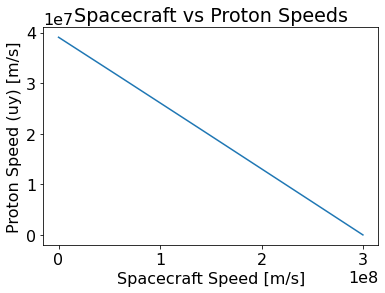

In [211]:
#PART B

v2 = np.arange(0, c, 1000)
gamma = 1 / ( (1 - (v2**2/c**2) )**1/2 )
theta = 15*(np.pi/180) #Units: degrees

ux_prime = 0.99*c #This is the speed of the proton if it were only traveling in the x-direction, like in Part A
uy_prime = 2*ux_prime*np.tan(theta/2) #This is the complete y-component at the edge of the cone

uy = uy_prime / (gamma*(1 + (v2/c**2)*ux_prime))

plt.plot(v2, uy)
plt.xlabel("Spacecraft Speed [m/s]")  
plt.ylabel("Proton Speed (uy) [m/s]")
plt.title("Spacecraft vs Proton Speeds")

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

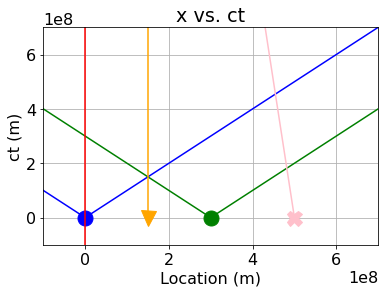

In [212]:
# PART A
x1 = 0 #units: m
x2 = 3E8 #units: m

#This is a function that plots the vertical axis of the ct line
def followxp(v, start, end): 
    numx = (np.arange(start, end))
    tprime = np.zeros(len(numx), dtype=int)
    xprime = numx*v   
    return tprime, xprime

#This is a function that illustrates the world line at a specific x-location
def world(v, pos, start, end):
    t = np.arange(start, end)
    x = (v*t + pos)
    return x, c*t

wl_1 = world(c, x1, 0, 10)[0]
wl_2 = world(c, x2, 0, 10)[0]
time = world(c, 0, 0, 10)[1]

#We need to account for the world lines going the opposite direction since the world lines of light can have positive or negative slopes
opp_wl_1 = world(-c, x1, 0, 10)[0]
opp_wl_2 = world(-c, x2, 0, 10)[0]

vert_time  = followxp(c, -10, 10)[0]
vert_x = followxp(c, 0-10, 10)[1]

# PART B
jwebb = 1.5E8 #units: m
v = 0 #The telescope is at rest
wl_jw = world(0, jwebb, 0, 10)[0]
time2 = world(0, 0, 0, 10)[1]


# PART C
probe = 5E8 #units: m
v_probe = -0.1*c
wl_probe = world(v_probe, probe, 0, 10)[0]


#Plotting the world lines of all of the locations
plt.plot(wl_1, time, color = "blue")  # This is the world line of the flashbulb at x = 0
plt.plot(wl_2, time, color = "green")# This is the world line of the flashbulb at x = 3E7 m
plt.plot(opp_wl_1, time, color = "blue")  
plt.plot(opp_wl_2, time, color = "green")

plt.plot(x1, 0, marker = "o", markersize = 15, color = "blue")
plt.plot(x2, 0, marker = "o", markersize = 15, color = "green") 

plt.plot(vert_time, vert_x, color = "r")

plt.plot(wl_jw, time2, color = "orange")
plt.plot(jwebb, 0, marker = "v", markersize = 15, color = "orange")

plt.plot(wl_probe, time2, color = "pink")
plt.plot(probe, 0, marker = "X", markersize = 15, color = "pink")

plt.xlim(-1E8, 7E8)
plt.ylim(-1E8, 7E8)
plt.xlabel("Location (m)")
plt.ylabel("ct (m)")
plt.title("x vs. ct")
plt.grid()


# Notes:
# Blue Linse = World lines for flashbulb at x = 0
# Green Lines = World lines for flashbulb at x = 3E8 meters
# Yellow Line = World line for James Webb Space Telescope 
# Pink Line = World line for alien probe
# Red Line = ct axis 

Based on my plot, I would say that the flashes were simultaneous in the point of the James Webb Space Telescope since the world lines of the flashes of light intersect the at the same time and position. 

However, from the point of the view of the microprobe, the flashes were not simultaneous since the world lines intersected at different places on the ct axis as seen above.